In [174]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from clover.over_sampling import ClusterOverSampler

df = pd.read_csv("data/processed_data.csv")

# Generating Balanced Dataset with Over-sampling

In [175]:
# Calculating ratio of majority and minority class
def ratio(df):
    print(df['STATUS'].value_counts())
    print(df['STATUS'].value_counts(normalize=True))
    print()

ratio(df)

1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64



In [176]:
non_int = ["ID", "TOTAL_GOOD_DEBT", "TOTAL_BAD_DEBT"]
for col in df:
    if df[col].dtypes == "object":
        non_int.append(col)
new_df = df.drop(columns=non_int)

In [177]:
# Considering numeric vars only
# Creating clustering (K-means) and then over-sampling (SMOTE - Synthetic Minority Over-sampling TEchnique)

# Dictionary to store top 5 variables - {score : var_name}
top = {}

y = pd.DataFrame(new_df["STATUS"])
for col in new_df:
    if col != 'STATUS':
        X = pd.DataFrame(new_df[col])
    
        # Create KMeans-ROS instance
        smote = SMOTE(random_state=13)
        kmeans = KMeans(n_clusters=8, random_state=17)
        kmeans_smote = ClusterOverSampler(oversampler=smote, clusterer=kmeans)

        # Fit and resample imbalanced data
        X_res, y_res = kmeans_ROS.fit_resample(X, y)
        print(col)
        ratio(y_res)

        # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

        # Decision Tree using Train Data
        dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
        dectree.fit(X_train, y_train)                    # train the decision tree model
        y_train_pred = dectree.predict(X_train)
        print("Train Data for " +  col)
        score = dectree.score(X_train, y_train)
        print(f'Accuracy  :\t{score}')
        print()
        
        if len(top) < 5:
            top[score] = col
        elif score > min(top.keys()):
            top.pop(min(top.keys()))
            top[score] = col

print()
print('BEST VARIABLES')
for key, val in top.items():
    print(f'{val}      \t: {key}')

C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)
C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)


FLAG_OWN_CAR
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_OWN_CAR
Accuracy  :	0.7887513723924543

FLAG_OWN_REALTY
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_OWN_REALTY
Accuracy  :	0.8266793093123066

CNT_CHILDREN
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for CNT_CHILDREN
Accuracy  :	0.6281565026449746

AMT_INCOME_TOTAL
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for AMT_INCOME_TOTAL
Accuracy  :	0.9772432378480886

FLAG_MOBIL
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_MOBIL
Accuracy  :	0.5008982932428386



C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)
C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)


FLAG_WORK_PHONE
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_WORK_PHONE
Accuracy  :	0.6359417107495758

FLAG_PHONE
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_PHONE
Accuracy  :	0.6439764447549655



C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)
C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)


FLAG_EMAIL
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_EMAIL
Accuracy  :	0.9479988022756762

CNT_FAM_MEMBERS
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for CNT_FAM_MEMBERS
Accuracy  :	0.8114083241840503

APPLICANT_AGE
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for APPLICANT_AGE
Accuracy  :	0.831120870346342

YEARS_WORKING
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for YEARS_WORKING
Accuracy  :	0.9211747679409122

GOOD_PERCENT
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for GOOD_PERCENT
Accuracy  :	0.999326280067871


BEST VARIABLES
AMT_INCOME_TOTAL      	: 0.9772432378480886
FLAG_EMAIL      	: 0.9479988022756762
APPLICANT_AGE      	: 0.831120870346342
YEARS_WO

C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)


# Prediction Using Balanced Dataset

In [178]:
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

'''Over-sampling'''

y1 = pd.DataFrame(new_df['STATUS'])
print('Before Over-sampling: ')
ratio(y1)

best = top.values()
for col in new_df:
    if col not in best:
        new_df.drop(columns=col, inplace=True)
x1 = pd.DataFrame(new_df)
print(x1.describe())
print()

X_temp, y_temp = kmeans_smote.fit_resample(x1, y1)
print('After Over-sampling: ')
ratio(y_temp)


'''Prediction'''

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_temp, y_temp, test_size=0.2)

dectree = DecisionTreeClassifier(max_depth = 3) # create the decision tree object
dectree.fit(X_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
print()

Before Over-sampling: 
1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64

       AMT_INCOME_TOTAL    FLAG_EMAIL  APPLICANT_AGE  YEARS_WORKING  \
count      2.513400e+04  25134.000000   25134.000000   25134.000000   
mean       1.948339e+05      0.100660      40.536166       7.204106   
std        1.045110e+05      0.300885       9.559474       6.414231   
min        2.700000e+04      0.000000      21.000000       0.000000   
25%        1.350000e+05      0.000000      33.000000       3.000000   
50%        1.800000e+05      0.000000      40.000000       5.000000   
75%        2.250000e+05      0.000000      48.000000      10.000000   
max        1.575000e+06      1.000000      67.000000      43.000000   

       GOOD_PERCENT  
count  25134.000000  
mean       0.995186  
std        0.069219  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

After Over-sampling: 
1    2504

<AxesSubplot:>

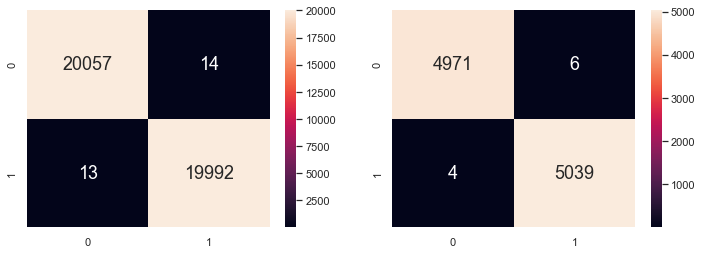

In [179]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.6666666666666666, 0.875, 'GOOD_PERCENT <= 0.5\ngini = 0.5\nsamples = 40076\nvalue = [20071, 20005]\nclass = Bad'),
 Text(0.5, 0.625, 'AMT_INCOME_TOTAL <= 303750.0\ngini = 0.003\nsamples = 20100\nvalue = [20071, 29]\nclass = Bad'),
 Text(0.3333333333333333, 0.375, 'AMT_INCOME_TOTAL <= 185200.0\ngini = 0.442\nsamples = 88\nvalue = [59, 29]\nclass = Bad'),
 Text(0.16666666666666666, 0.125, 'gini = 0.348\nsamples = 58\nvalue = [45, 13]\nclass = Bad'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 30\nvalue = [14, 16]\nclass = Good'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 20012\nvalue = [20012, 0]\nclass = Bad'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 19976\nvalue = [0, 19976]\nclass = Good')]

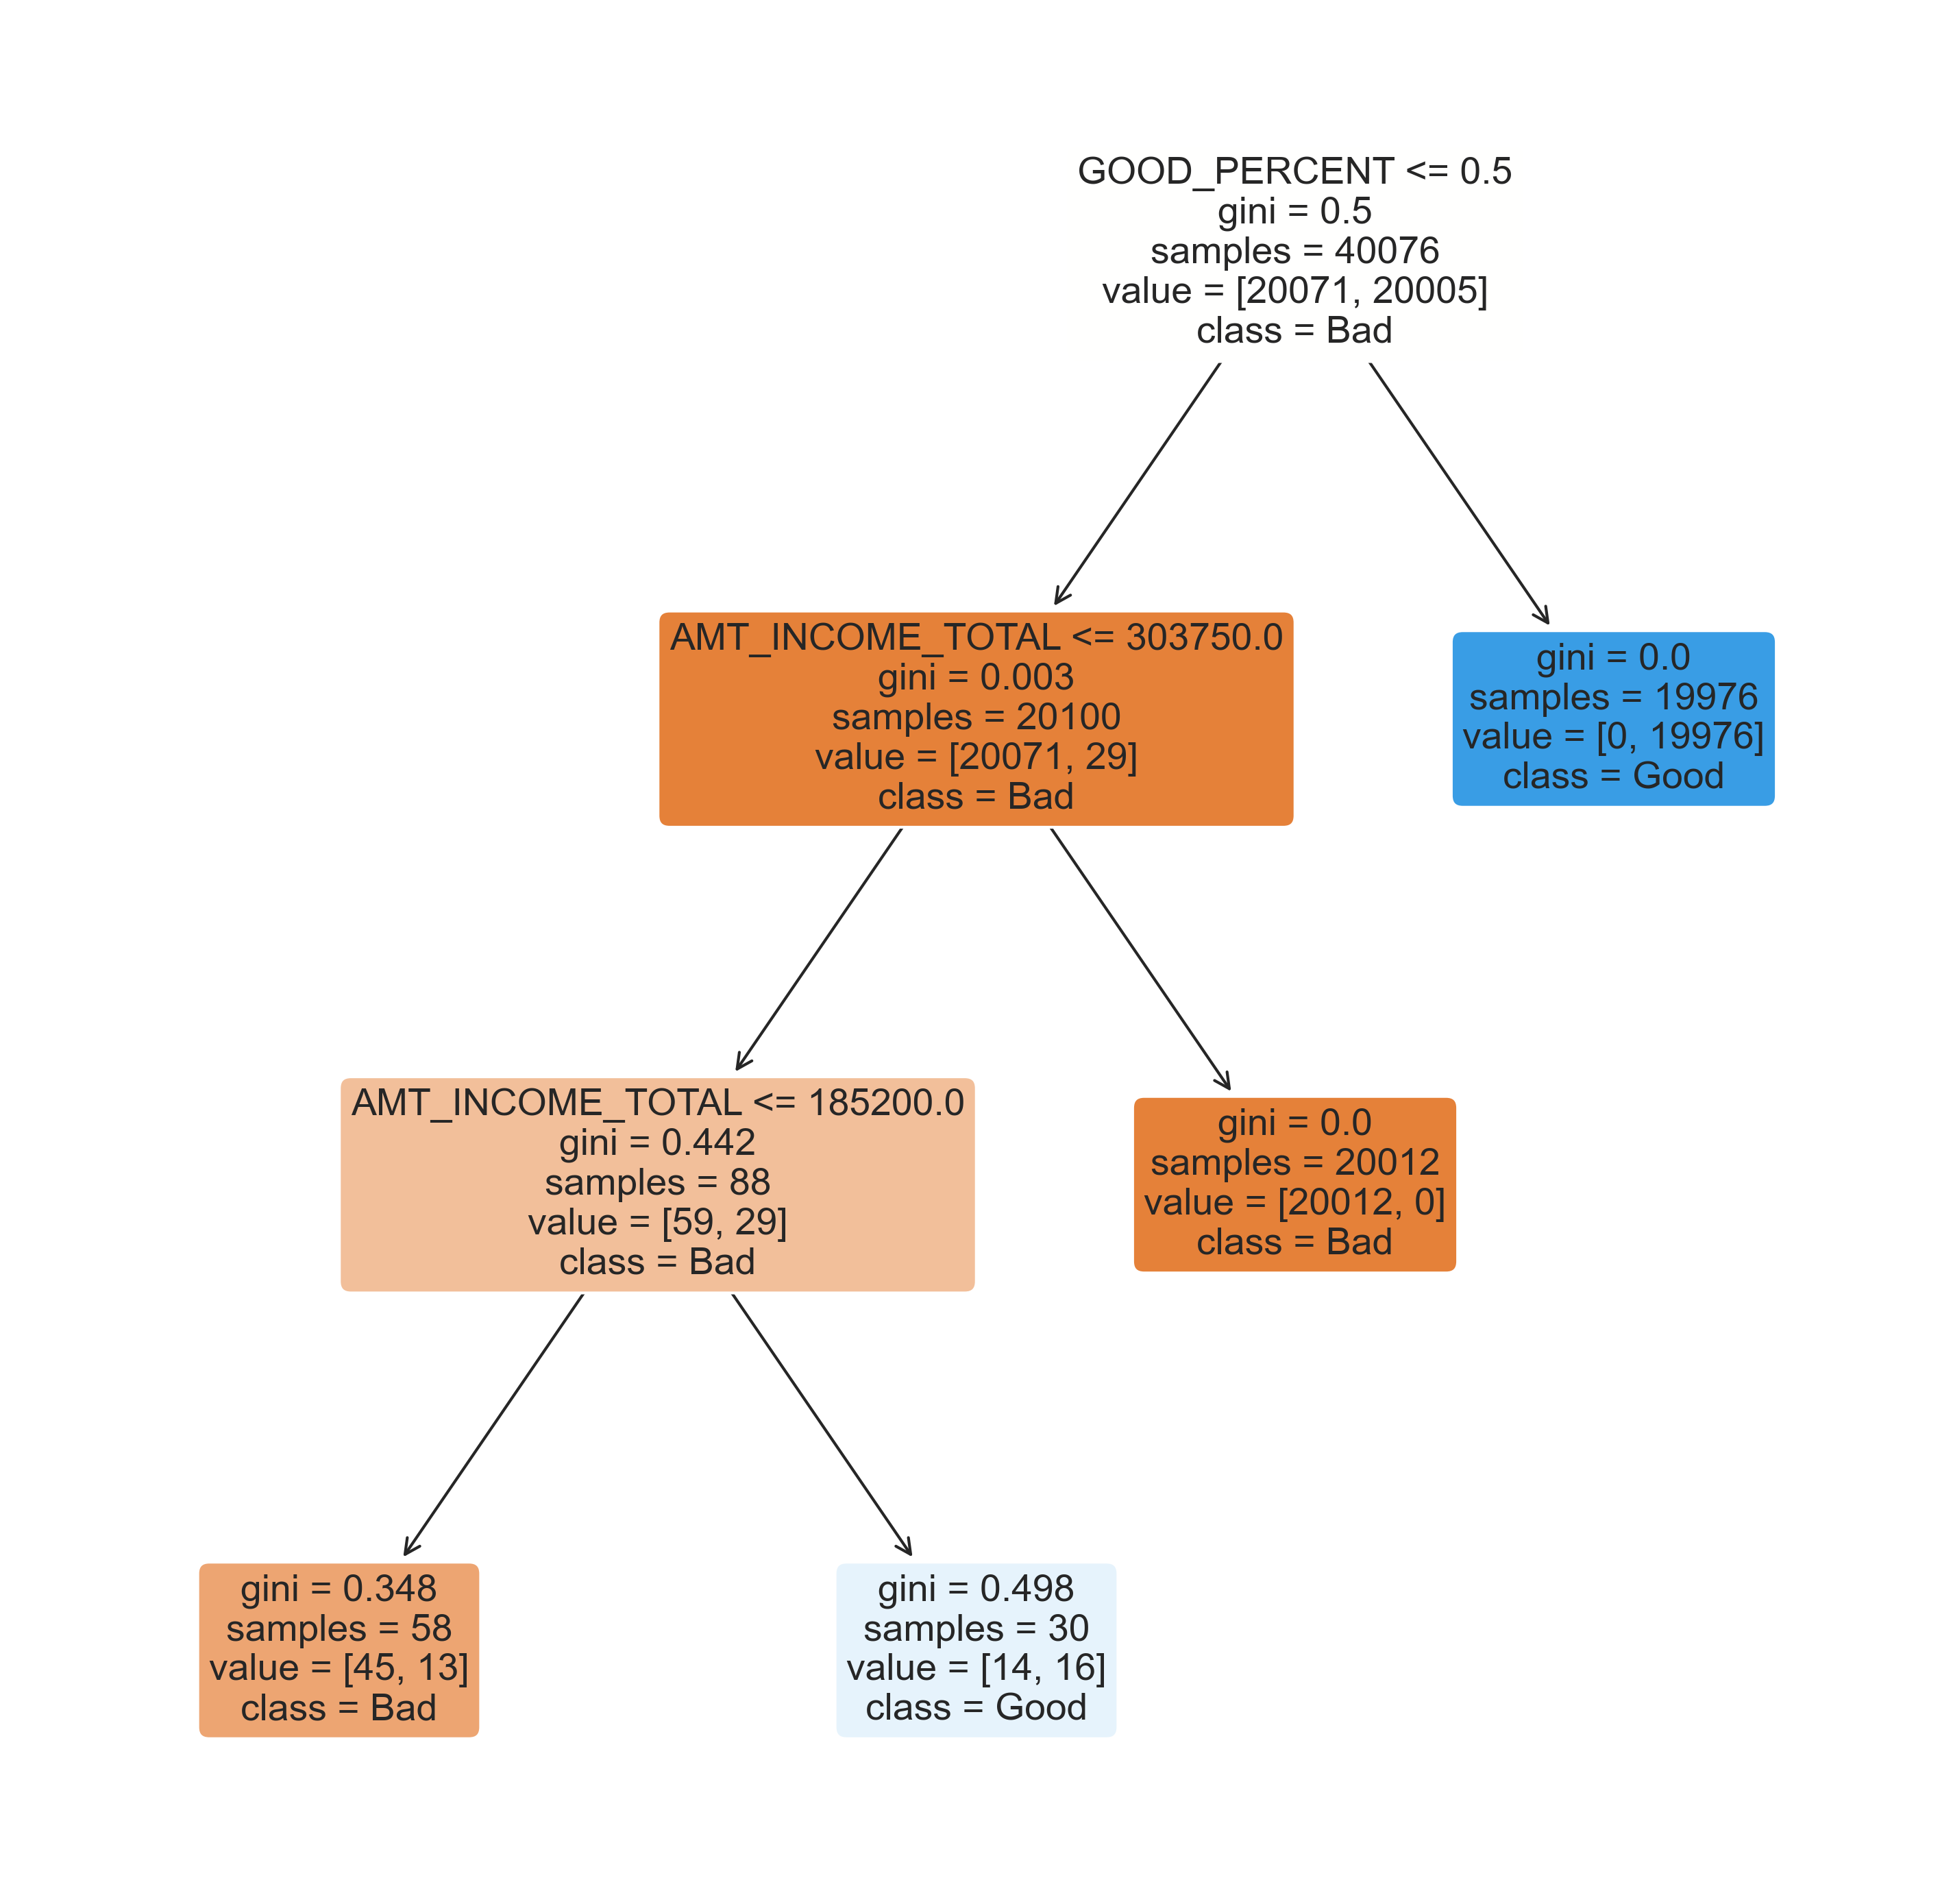

In [180]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12), dpi = 300)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train1.columns, 
          class_names=["Bad","Good"])